In [1]:
#!pip install kagglehub

In [2]:
from textblob import TextBlob
import textstat
import seaborn as sns

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("saurabhshahane/fake-news-classification")

print("Path to dataset files:", path)

C:\Users\qtg4ys\Documents\DS3001\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\qtg4ys\.cache\kagglehub\datasets\saurabhshahane\fake-news-classification\versions\77


In [4]:
import os
import pandas as pd
import numpy as np

dataset_path = kagglehub.dataset_download('saurabhshahane/fake-news-classification')

print("Path to dataset files:", dataset_path)

raw_dataset = os.path.join(dataset_path, 'WELFake_Dataset.csv')
df = pd.read_csv(raw_dataset)

print(df.head())

Path to dataset files: C:\Users\qtg4ys\.cache\kagglehub\datasets\saurabhshahane\fake-news-classification\versions\77
   Unnamed: 0                                              title  \
0           0  LAW ENFORCEMENT ON HIGH ALERT Following Threat...   
1           1                                                NaN   
2           2  UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...   
3           3  Bobby Jindal, raised Hindu, uses story of Chri...   
4           4  SATAN 2: Russia unvelis an image of its terrif...   

                                                text  label  
0  No comment is expected from Barack Obama Membe...      1  
1     Did they post their votes for Hillary already?      1  
2   Now, most of the demonstrators gathered last ...      1  
3  A dozen politically active pastors came here f...      0  
4  The RS-28 Sarmat missile, dubbed Satan 2, will...      1  


Text(0.5, 1.0, 'Fake vs Real Articles Count')

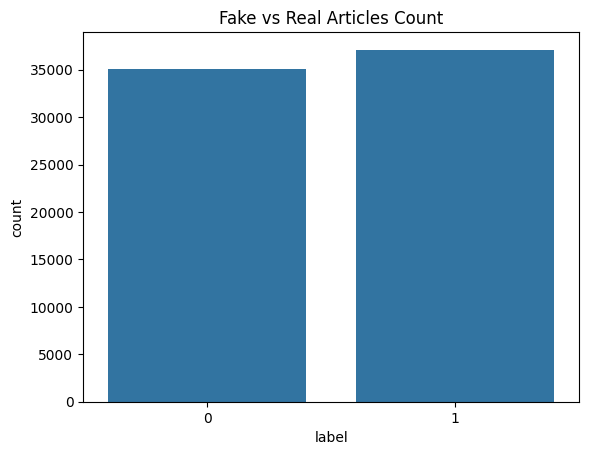

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="label", data=df)
plt.title("Fake vs Real Articles Count")

In [6]:
# missing
print("Missing Rows:", df.isna().sum())

# duplicates
print("Duplicate rows:", df.duplicated().sum())

Missing Rows: Unnamed: 0      0
title         558
text           39
label           0
dtype: int64
Duplicate rows: 0


Text(0.5, 1.0, 'Word Count — Fake vs Real')

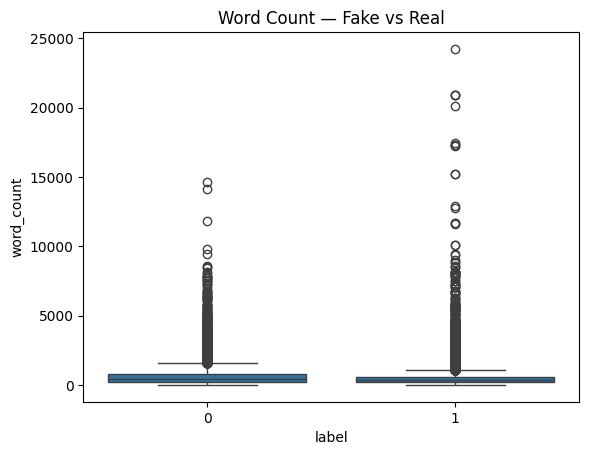

In [7]:
df["word_count"] = df["text"].apply(lambda t: len(str(t).split()))
df["char_count"] = df["text"].apply(lambda t: len(str(t)))

sns.boxplot(x="label", y="word_count", data=df)
plt.title("Word Count — Fake vs Real")

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

#top word counts from fake and real news articles
df_clean = df.dropna(subset=["text"])

fake_text = df_clean[df_clean["label"] == 1]["text"]
real_text = df_clean[df_clean["label"] == 0]["text"]

cv = CountVectorizer(stop_words="english", max_features=20)

fake_counts = cv.fit_transform(fake_text)
fake_words = pd.DataFrame({
    "word": cv.get_feature_names_out(),
    "count": fake_counts.toarray().sum(axis=0)
}).sort_values(by="count", ascending=False)

real_counts = cv.fit_transform(real_text)
real_words = pd.DataFrame({
    "word": cv.get_feature_names_out(),
    "count": real_counts.toarray().sum(axis=0)
}).sort_values(by="count", ascending=False)

fake_words, real_words


(          word   count
 17       trump  106364
 14        said   49712
 12      people   48653
 1      clinton   45411
 13   president   38982
 6         just   34612
 7         like   31766
 5      hillary   31592
 11       obama   28615
 9          new   28334
 16        time   26155
 15       state   25340
 2       donald   24955
 10        news   21866
 0     american   20847
 8        media   20393
 3     election   20309
 4   government   20190
 19       world   19811
 18       white   19445,
           word   count
 12        said  184607
 17       trump  107201
 5           mr   66086
 9    president   51300
 6          new   42528
 8       people   41792
 13       state   38871
 14      states   31668
 2   government   30110
 11     reuters   29342
 3        house   28578
 1      clinton   28569
 19        year   28154
 18      united   27740
 10  republican   26548
 4         like   24796
 16        told   23991
 0     campaign   23383
 15        time   23335
 7        obama

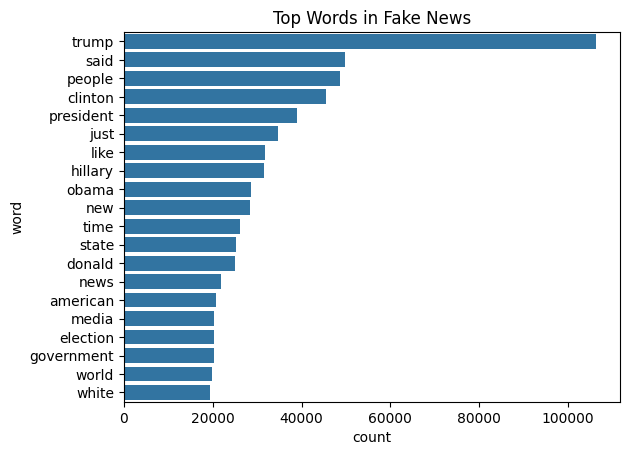

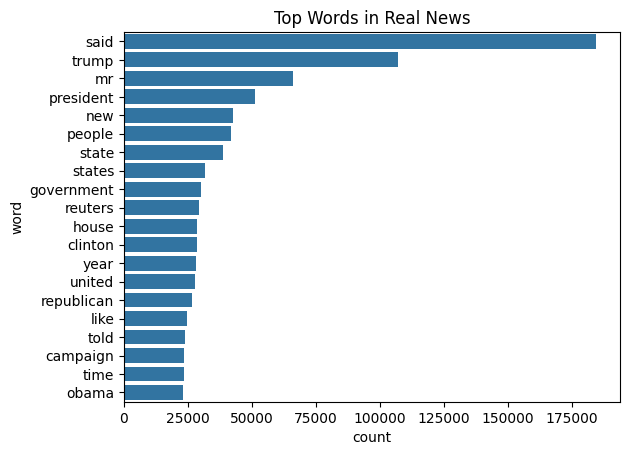

In [9]:
#plots of word counts
sns.barplot(
    data=fake_words,
    x="count",
    y="word"
)
plt.title("Top Words in Fake News")
plt.show()

sns.barplot(
    data=real_words,
    x="count",
    y="word"
)
plt.title("Top Words in Real News")
plt.show()

In [10]:
sample_size = 10000  # total

df_sample = (
    df_clean
    .groupby("label", group_keys=False)
    .apply(lambda x: x.sample(sample_size // 2, random_state=42))
)


C:\Users\qtg4ys\AppData\Local\Temp\ipykernel_7520\3372995961.py:6: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(sample_size // 2, random_state=42))


Text(0.5, 1.0, 'VADER Sentiment Distribution: Fake vs Real')

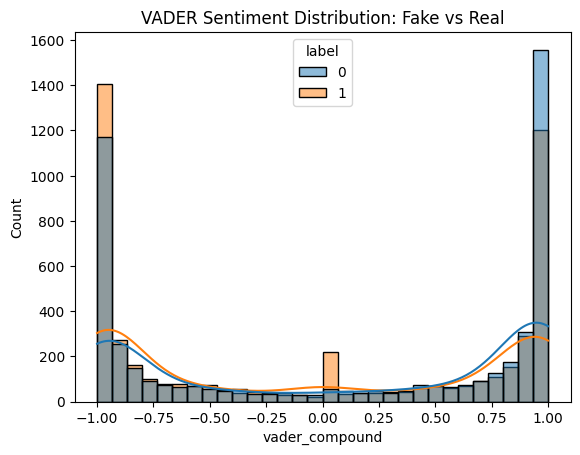

In [11]:
#sentiment analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
df_sample["vader_compound"] = df_sample["text"].apply(lambda t: analyzer.polarity_scores(t)["compound"])
sns.histplot(
    data=df_sample,
    x="vader_compound",
    hue="label",
    bins=30,
    kde=True
)
plt.title("VADER Sentiment Distribution: Fake vs Real")

<Axes: xlabel='label', ylabel='flesch'>

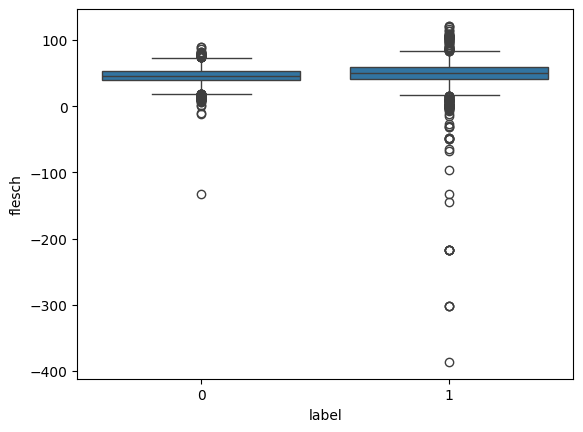

In [12]:
#readibility metrics
df_sample["flesch"] = df_sample["text"].apply(lambda t: textstat.flesch_reading_ease(str(t)))

sns.boxplot(x="label", y="flesch", data=df_sample)

C:\Users\qtg4ys\AppData\Local\Temp\ipykernel_7520\2766944691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean["word_count"] = df_clean["text"].apply(lambda t: len(str(t).split()))


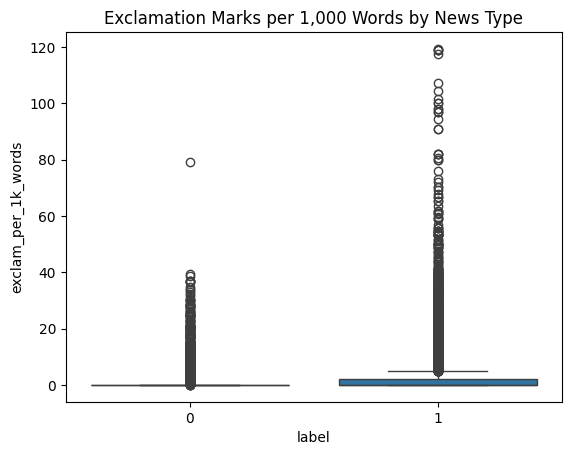

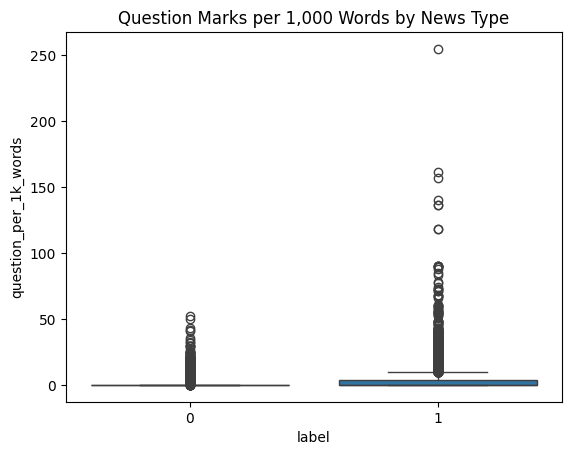

In [13]:
#punctuation counts
df_clean["word_count"] = df_clean["text"].apply(lambda t: len(str(t).split()))
df_clean = df_clean[df_clean["word_count"] >= 50]
df_clean["exclamations"] = df_clean["text"].apply(lambda t: str(t).count("!"))
df_clean["questions"] = df_clean["text"].apply(lambda t: str(t).count("?"))

df_clean["exclam_per_1k_words"] = (
    df_clean["exclamations"] / df_clean["word_count"]
) * 1000

df_clean["question_per_1k_words"] = (
    df_clean["questions"] / df_clean["word_count"]
) * 1000

sns.boxplot(
    x="label",
    y="exclam_per_1k_words",
    data=df_clean
)
plt.title("Exclamation Marks per 1,000 Words by News Type")
plt.show()

sns.boxplot(
    x="label",
    y="question_per_1k_words",
    data=df_clean
)
plt.title("Question Marks per 1,000 Words by News Type")
plt.show()


In [14]:
df_clean.sort_values(
    "question_per_1k_words",
    ascending=False
).head(10)[["text", "word_count", "question_per_1k_words", "label"]]


,text,word_count,question_per_1k_words,label
37815,White House deputy press secretary Sarah Hucka...,369,254.742547,1
64830,VOTE for Trump!!!! WE CAN DO IT GET OUT AND vo...,68,161.764706,1
69874,#TrumpTrain??????????@realDonaldTrump isn t go...,70,157.142857,1
18904,Shock!!!! Hasn't this been in the news for yea...,57,140.350877,1
31502,Can't say under God at Hilary speech!?!??!?? L...,110,136.363636,1
13860,Can't say under God at Hilary speech!?!??!?? L...,110,136.363636,1
14095,"Once you ve read this list, you re going to wa...",288,118.055556,1
61925,"Once you ve read this list, you re going to wa...",288,118.055556,1
23110,iTS DARK ALRIGHT . In a sad twist of fate thes...,89,89.887640,1
25190,iTS DARK ALRIGHT . In a sad twist of fate thes...,89,89.887640,1


In [15]:
print(df_clean.loc[69874, "text"][:5000])

#TrumpTrain??????????@realDonaldTrump isn t going anywhere. The MASSIVE MOVEMENT continues. Together, we will ALL #MAGA! #AmericaFirst pic.twitter.com/O0uOgFVuXJ  Dan Scavino Jr. (@DanScavino) October 8, 2016THE CROWD GOES NUTS!Donald Trump waves, high-fives supporters outside Trump Tower after a day of fallout over his 2005 sexually-charged comments. pic.twitter.com/Ri3ClKcviR  ABC News (@ABC) October 8, 2016THE NYPD had a message for all of the TRUMP supporters gathered outside of Trump Tower via speaker: ? GO TRUMP! 


In [16]:
print(df_clean.loc[64830, "text"][:5000])

VOTE for Trump!!!! WE CAN DO IT GET OUT AND vote AND take A friend OR friends>>> we want a safe country.Clinton NEED TO TAKE HER POCKET BOOK AND BILL HOME. do you want Bill to be FIRST LADY in OUR White House??? Do you remember the last time????Trump will work for ALL the people instead of his POCKET BOOK, won't that be NICE???? PLEASE VOTE THANK YOU!!!!


In [17]:
print(df_clean.loc[23110, "text"][:5000])

iTS DARK ALRIGHT . In a sad twist of fate these black people in power are doing more to damage black people &#39;s reptutation than any white people ever could . Whats wrong with them ?? Where are they in the streets complaing about corruption ???? Where are they at the voting booths voting against it ?? Thats what you get when you back the very people who fought  hard to keep them slaves and i might add where the KKK  . They need to wake up  fast .


In [18]:
fake_df = df_clean[(df_clean["label"] == 0)]
fake_df.sort_values(
    "question_per_1k_words",
    ascending=False
).head(5)[["text", "word_count", "question_per_1k_words", "label"]]

,text,word_count,question_per_1k_words,label
20441,WASHINGTON (Reuters) - President Donald Trump ...,96,52.083333,0
55977,"During this week’s “Saturday Night Live,” Alec...",140,50.000000,0
29007,What if the latest craze among the big-governm...,920,43.478261,0
57615,"Friday in Washington, D. C. at the Partnership...",216,41.666667,0
37878,What if Hillary Clinton is in legal hot water ...,929,40.904198,0


In [19]:
print(df_clean.loc[55977, "text"][:5000])

During this week’s “Saturday Night Live,” Alec Baldwin as President Donald Trump spoke with NBC’s Lester Holt, played by Michael Che, in an interview.  In the skit, Baldwin admitted to firing FBI Director James Comey because he was investigating the alleged ties to Russia. Partial transcript as follows: CHE: Your staff has been insisting all week you didn’t fire [Comey] because of his Russian investigation. BALDWIN: No, I did. CHE: Wait, what? BALDWIN: I fired him because of Russia. I thought, “He’s investigating Russia. I don’t like that. I should fire him. ” CHE: And you’re just admitting that? BALDWIN: Uh huh. CHE: But that’s obstruction of justice. BALDWIN: Sure, OK. CHE: Wait, so did I get him? Is this all over? Oh, no, I didn’t? Nothing matters? Absolutely nothing matters anymore? All right. Follow Trent Baker on Twitter @MagnifiTrent


In [20]:
print(df_clean.loc[20441, "text"][:5000])

WASHINGTON (Reuters) - President Donald Trump on Monday responded to charges against former campaign manager Paul Manafort by saying the allegations predated his tenure on Trump’s 2016 presidential campaign, but the indictment states the activities continued into 2017. “Sorry, but this is years ago, before Paul Manafort was part of the Trump campaign. But why aren’t Crooked Hillary & the Dems the focus?????” Trump wrote, referring to his former Democratic opponent Hillary Clinton. The indictment says Manafort and associate Rick Gates conspired to defraud the United States “from in or about and between 2006 and 2017.” 
